In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load datasets
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
# Add class labels
df_fake["class"] = 0
df_true["class"] = 1

In [4]:
# Manual testing data
df_fake_manual_testing = df_fake.tail(20000)
df_fake = df_fake.iloc[:-10, :]

df_true_manual_testing = df_true.tail(20000)
df_true = df_true.iloc[:-10, :]

df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv", index=False)


In [5]:
# Merging datasets
df_merge = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)

# Data preprocessing
df_merge = df_merge.drop(["title", "subject", "date"], axis=1)
df_merge = df_merge.sample(frac=1).reset_index(drop=True)

# Text preprocessing function
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

<>:11: SyntaxWarning: invalid escape sequence '\['
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\['
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\w'
C:\Users\rdroh\AppData\Local\Temp\ipykernel_18208\1870597687.py:11: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\rdroh\AppData\Local\Temp\ipykernel_18208\1870597687.py:13: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\rdroh\AppData\Local\Temp\ipykernel_18208\1870597687.py:17: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [6]:
# Apply text preprocessing
df_merge["text"] = df_merge["text"].apply(wordopt)

# Splitting the data
x = df_merge["text"]
y = df_merge["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [7]:
# Vectorization
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [8]:
# Initialize classifiers
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
gb_model = GradientBoostingClassifier()
rf_model = RandomForestClassifier()

# Train the models
lr_model.fit(xv_train, y_train)
dt_model.fit(xv_train, y_train)
gb_model.fit(xv_train, y_train)
rf_model.fit(xv_train, y_train)

# Prediction
lr_pred = lr_model.predict(xv_test)
dt_pred = dt_model.predict(xv_test)
gb_pred = gb_model.predict(xv_test)
rf_pred = rf_model.predict(xv_test)

# Model Evaluation
lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [9]:
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))



Logistic Regression Accuracy: 0.9837
Decision Tree Accuracy: 0.9947
Gradient Boosting Accuracy: 0.994
Random Forest Accuracy: 0.9902

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4986
           1       0.98      0.99      0.98      5014

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4986
           1       1.00      0.99      0.99      5014

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99

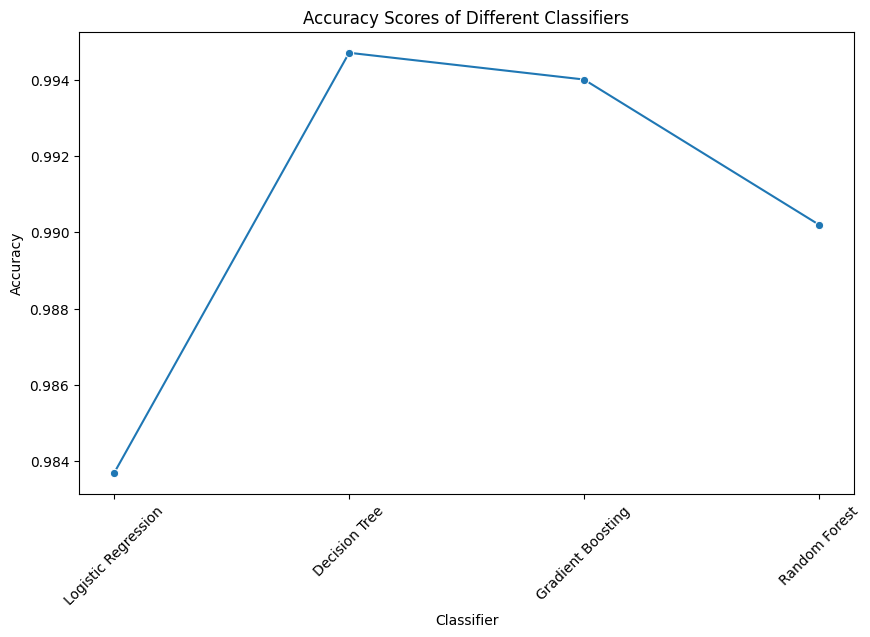

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [lr_accuracy, dt_accuracy, gb_accuracy, rf_accuracy]

# Classifier names
classifiers = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']

# Create a DataFrame
data = {'Classifier': classifiers, 'Accuracy': accuracy_scores}
df = pd.DataFrame(data)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Classifier', y='Accuracy', marker='o', data=df)
plt.title('Accuracy Scores of Different Classifiers')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
